In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
from matplotlib import pyplot as plt
import sklearn
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from pca import pca
import itertools
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder() 
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

loading data


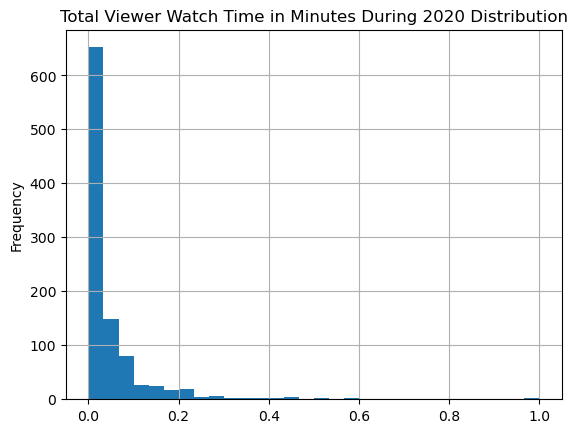

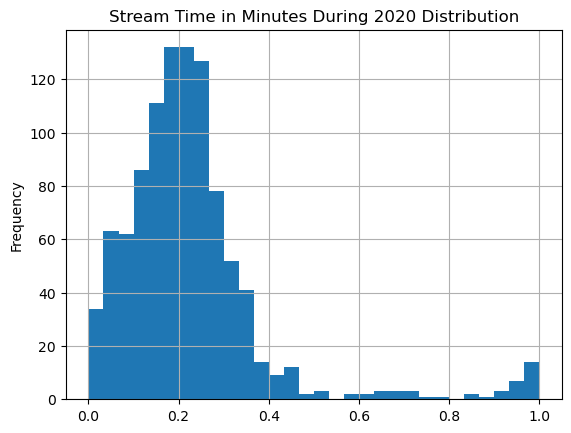

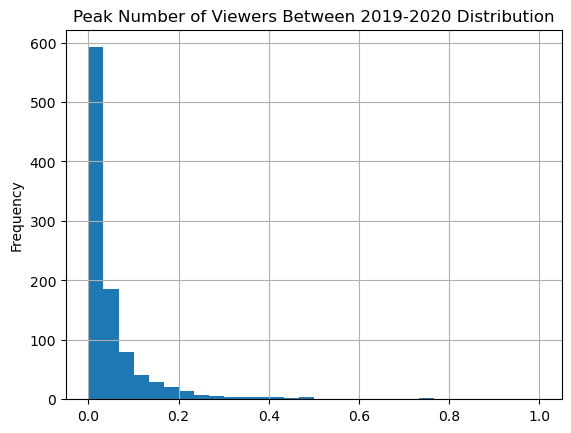

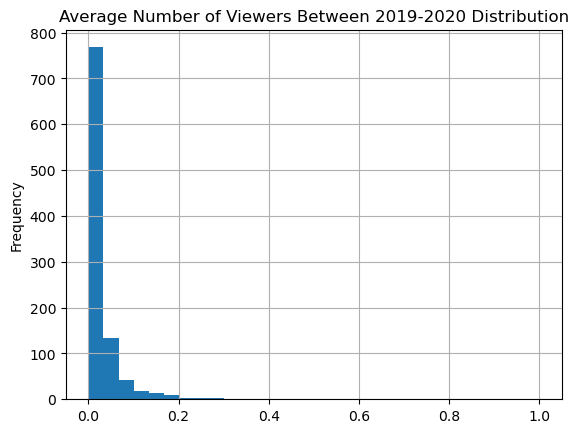

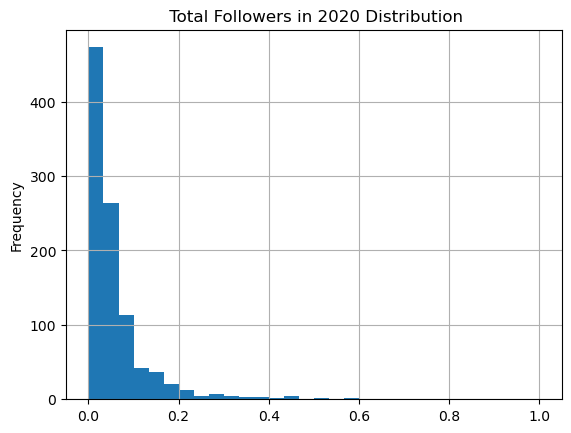

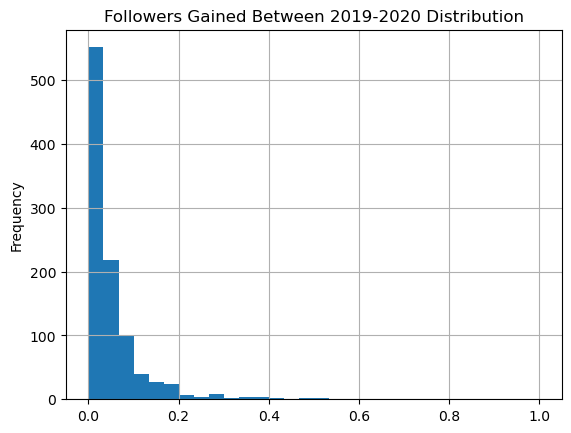

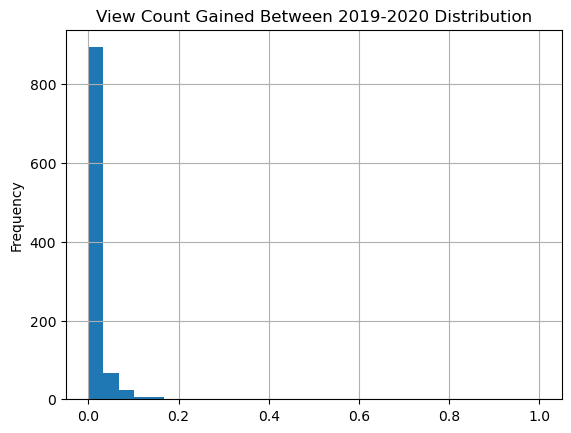

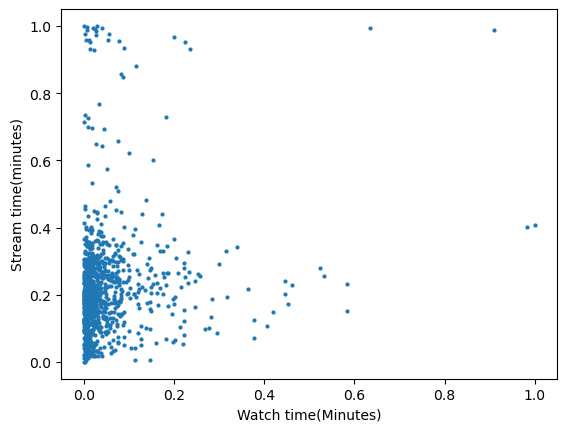

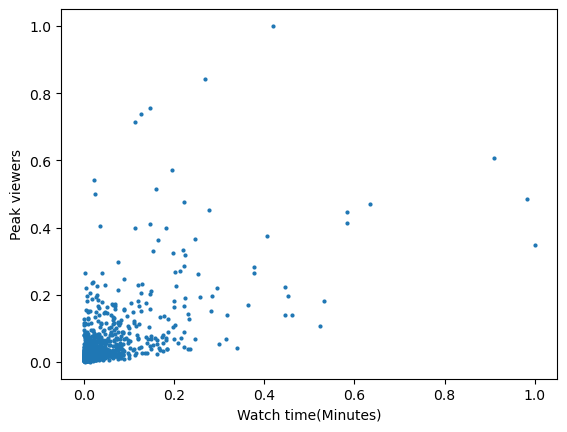

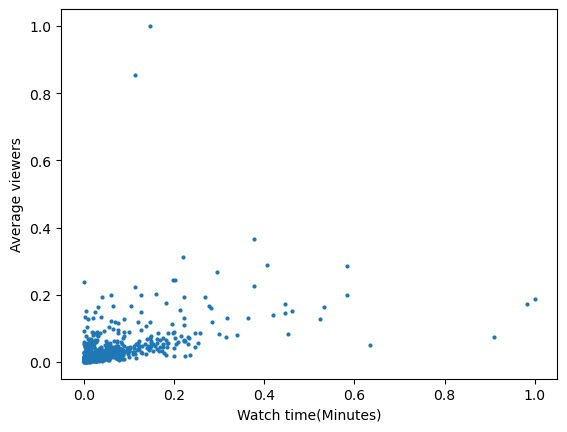

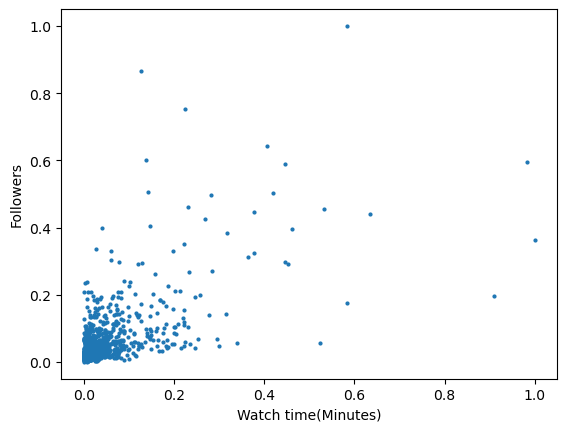

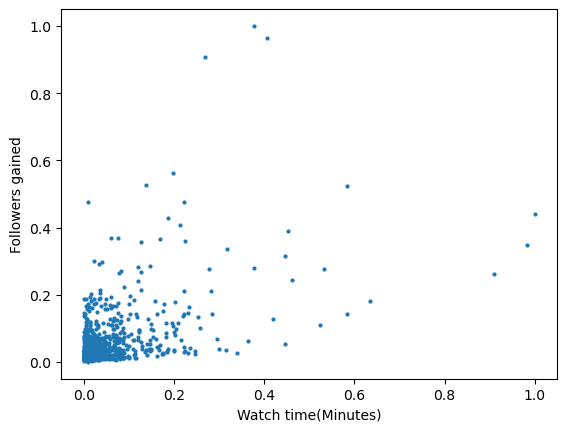

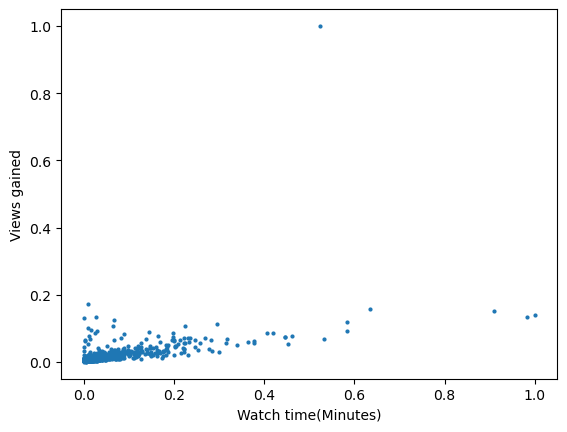

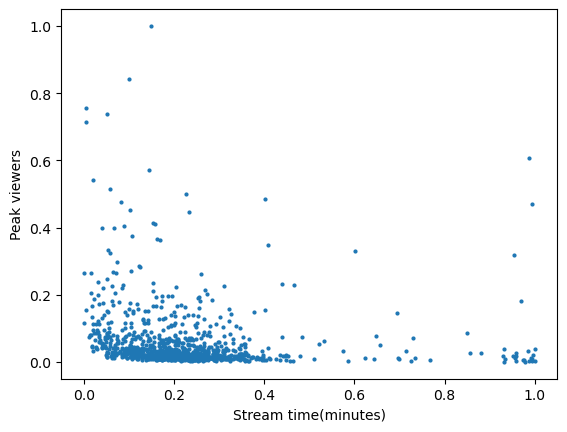

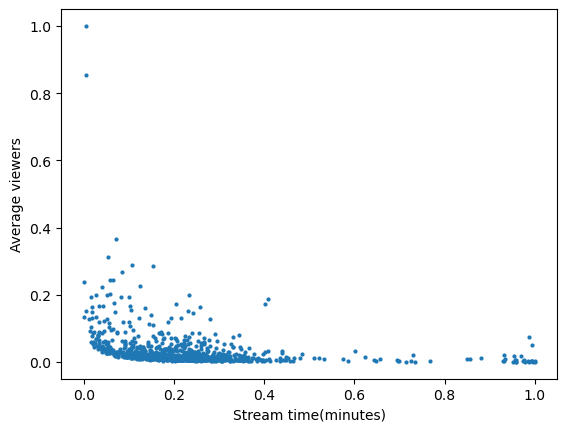

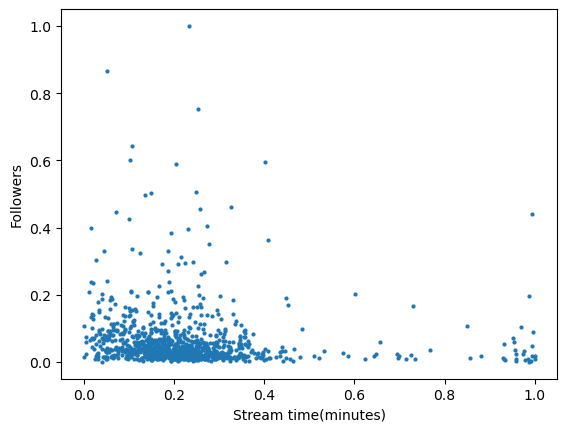

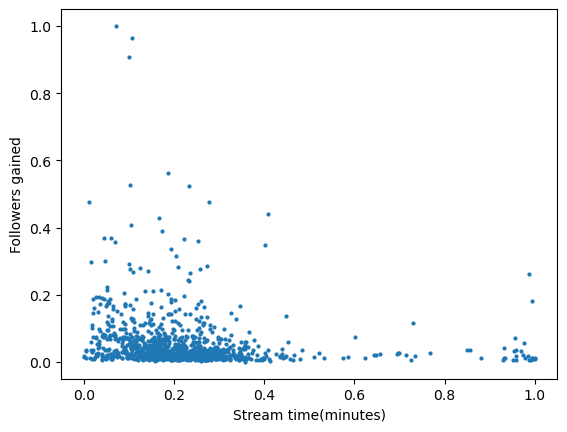

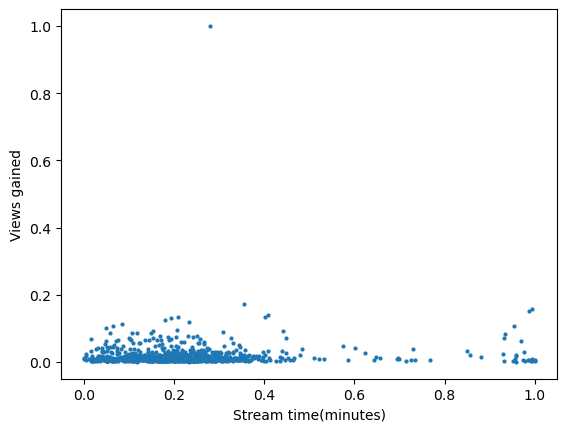

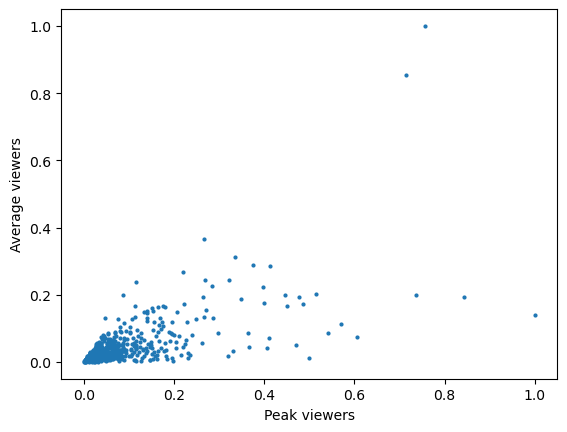

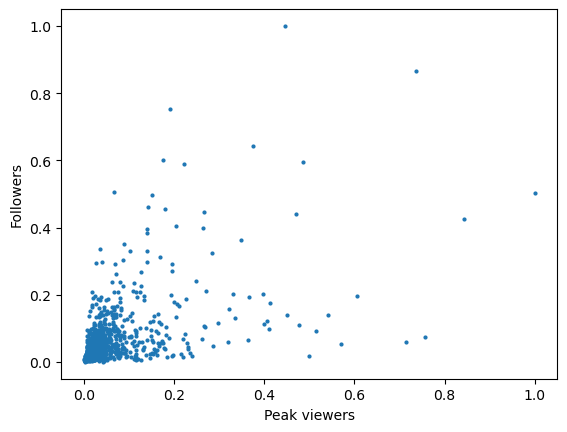

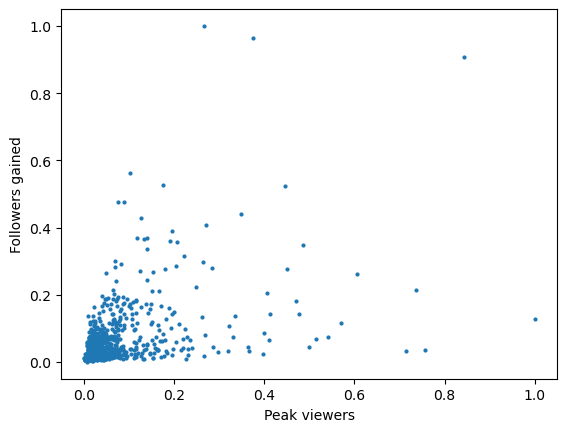

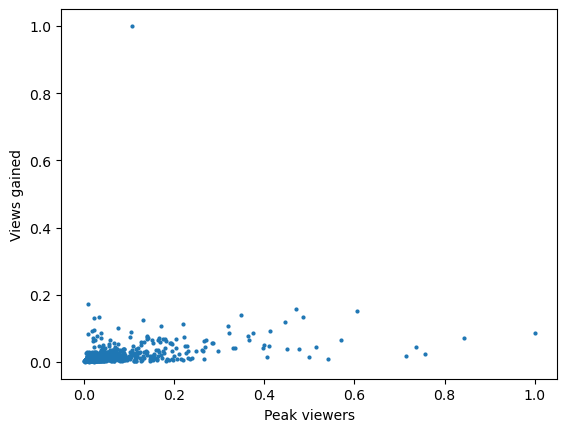

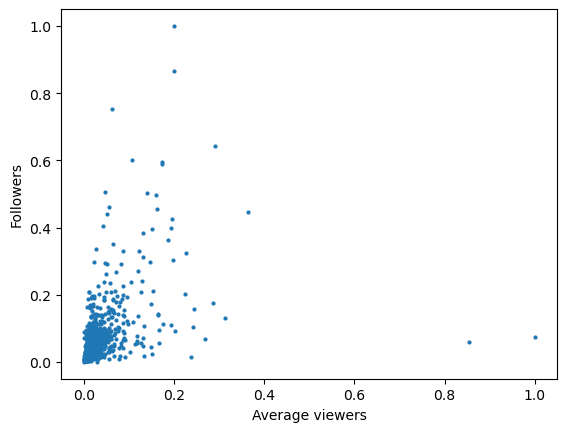

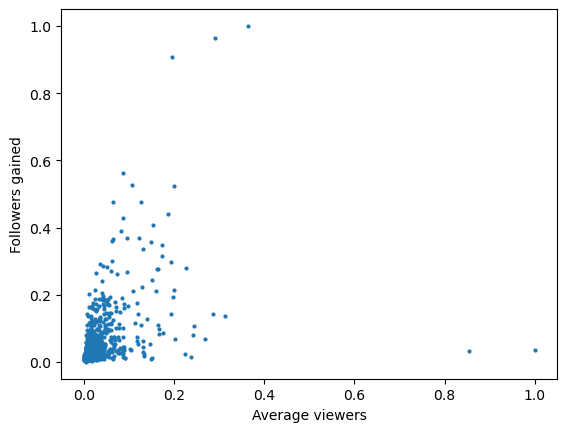

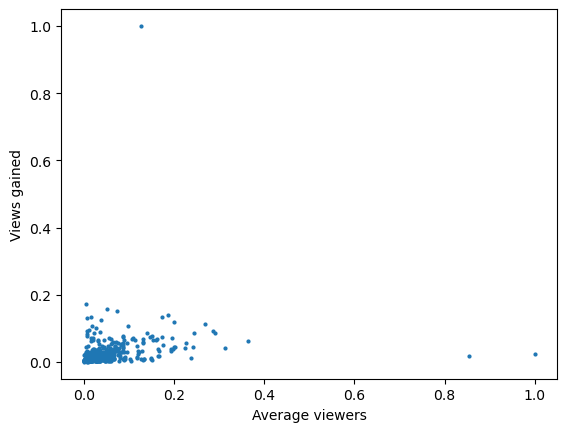

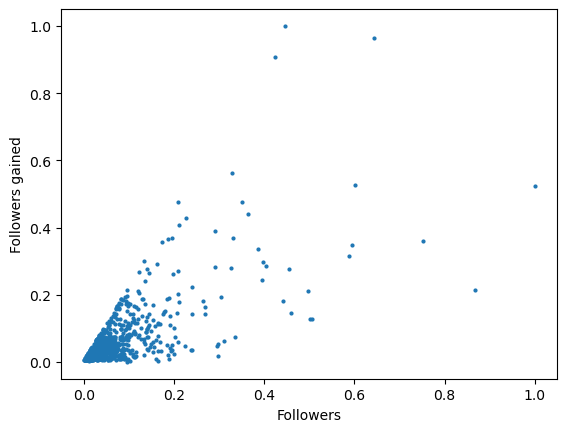

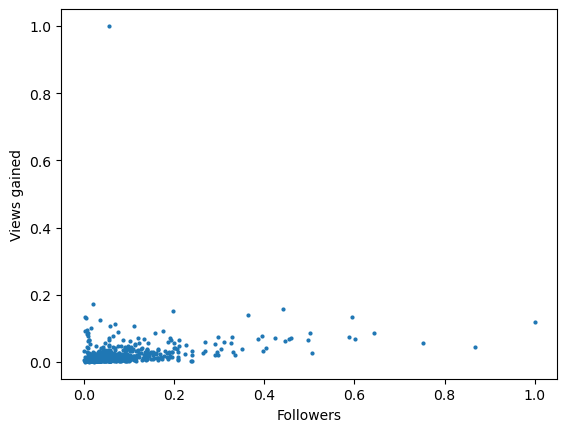

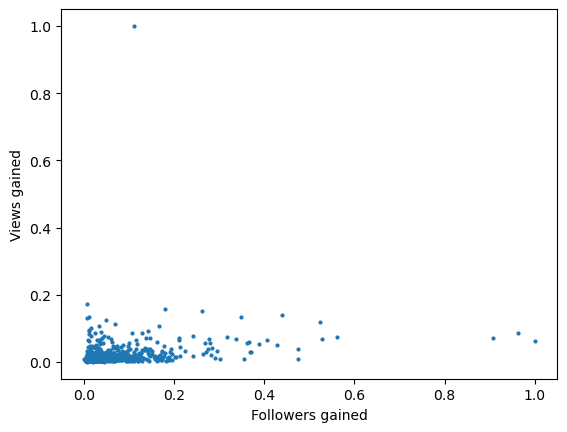

In [2]:
########################################################################################################################################################
##  BOOK 1  ############################################################################################################################################
########################################################################################################################################################

#(Ingest)
#Reading the data in from Excel

print("loading data")

twitch_data = pd.read_csv("twitchdata-update.csv")

#(Cleaning)
#Eliminating non-numeric data & transforming the data to values between 0 and 1
twitch_data['Watch time(Minutes)'].fillna(twitch_data['Watch time(Minutes)'].mean(), inplace=True)
twitch_data['Peak viewers'].fillna(twitch_data['Peak viewers'].mean(), inplace=True)
twitch_data['Average viewers'].fillna(twitch_data['Average viewers'].mean(), inplace=True)
twitch_data['Followers'].fillna(twitch_data['Followers'].mean(), inplace=True)

twitch_data['Partnered'].fillna(twitch_data['Partnered'].value_counts().index[0], inplace=True) #Boolean
twitch_data['Mature'].fillna(twitch_data['Mature'].value_counts().index[0], inplace=True) #Boolean 
twitch_data['Language'].fillna(twitch_data['Language'].value_counts().index[0], inplace=True) #Categorical
twitch_data['Channel'].fillna(twitch_data['Channel'].value_counts().index[0], inplace=True) #Categorical

#Categorical Encoding for string columns
cat_encoder = OneHotEncoder()
#twitch_data["Channel"] = twitch_data["Channel"].astype('category')
#twitch_data.dtypes
#twitch_data["Channel_cat"] = twitch_data["Channel"].cat.codes
#twitch_data.head()


twitch_data["Channel"] = twitch_data["Channel"].astype('category')
twitch_data.dtypes
twitch_data["Channel"] = twitch_data["Channel"].cat.codes

twitch_data["Language"] = twitch_data["Language"].astype('category')
twitch_data.dtypes
twitch_data["Language"] = twitch_data["Language"].cat.codes

twitch_data.head()


#(Transform)
#Scaling Data
#scaled_data = twitch_data[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'Followers gained', 'Views gained']]

#for column in scaled_data.columns:
#    scaled_data[column] = (scaled_data[column] - scaled_data[column].min()) / (scaled_data[column].max() - scaled_data[column].min())

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(twitch_data[["Watch time(Minutes)", "Peak viewers", "Average viewers", "Followers", "Partnered", "Mature", "Stream time(minutes)", "Followers gained", "Views gained"]])
norm_names = scaler.get_feature_names_out()
scaled_data = pd.DataFrame(data_norm, columns=norm_names)

scaled_data.describe()

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(twitch_data[["Watch time(Minutes)", "Peak viewers", "Average viewers", "Followers", "Partnered", "Mature", "Stream time(minutes)", "Followers gained", "Views gained", "Language"]])
norm_names = scaler.get_feature_names_out()
scaled_data = pd.DataFrame(data_norm, columns=norm_names)

scaled_data.describe()

twitch_dict = {0:'Watch time(Minutes)',1:'Stream time(minutes)',2:'Peak viewers',3: 'Average viewers', 4:'Followers',5:'Followers gained',6:'Views gained'}

#Histograms for all numerical predictors
    
watch_time_histogram = scaled_data.hist(column=['Watch time(Minutes)'], bins=30)
plt.ylabel("Frequency")
plt.title("Total Viewer Watch Time in Minutes During 2020 Distribution")

stream_time_histogram = scaled_data.hist(column=['Stream time(minutes)'], bins=30)
plt.ylabel("Frequency")
plt.title("Stream Time in Minutes During 2020 Distribution")


peak_viewers_histogram = scaled_data.hist(column=['Peak viewers'], bins=30)
plt.ylabel("Frequency")
plt.title("Peak Number of Viewers Between 2019-2020 Distribution")


average_viewers_histogram = scaled_data.hist(column=['Average viewers'], bins=30)
plt.ylabel("Frequency")
plt.title("Average Number of Viewers Between 2019-2020 Distribution")


followers_histogram = scaled_data.hist(column=['Followers'], bins=30)
plt.ylabel("Frequency")
plt.title(" Total Followers in 2020 Distribution")


followers_gained_histogram = scaled_data.hist(column=['Followers gained'], bins=30)
plt.ylabel("Frequency")
plt.title("Followers Gained Between 2019-2020 Distribution")


views_gained_histogram = scaled_data.hist(column=['Views gained'], bins=30)
plt.ylabel("Frequency")
plt.title("View Count Gained Between 2019-2020 Distribution")
plt.show()

#Scattergrams

for index in range(0,len(twitch_dict)-1):
    for index1 in range(index,len(twitch_dict)-1):
        plt.scatter(scaled_data[twitch_dict[index]],scaled_data[twitch_dict[index1+1]],s=4)
        plt.xlabel(twitch_dict[index])
        plt.ylabel(twitch_dict[index1+1])
        plt.show()


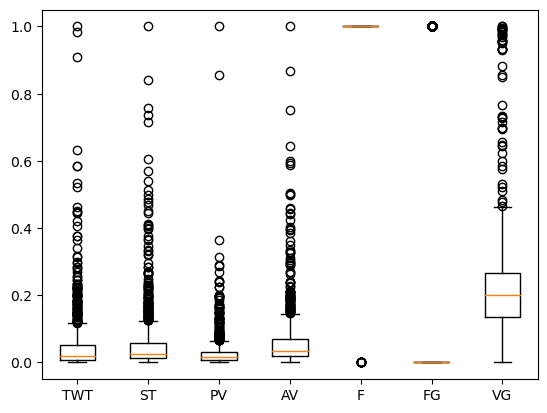

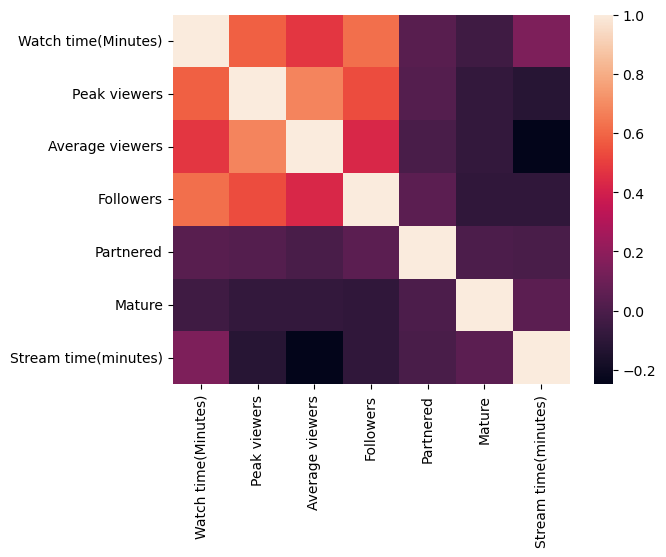

In [3]:
#Box plots for all numerical predictors

box_plot = plt.boxplot(scaled_data[list(scaled_data.columns)[0:7]])
plt.xticks([1,2,3,4,5,6,7], ['TWT', 'ST', 'PV','AV','F','FG','VG'])
plt.show()

#Correlation matrix

sns.heatmap(scaled_data[list(scaled_data.columns)[0:7]].corr())
plt.show()


In [4]:

twitch_data.dropna(inplace=True)
codes = cat_encoder.fit_transform(twitch_data[["Watch time(Minutes)", "Peak viewers", "Average viewers", "Followers", "Partnered", "Mature", "Stream time(minutes)", "Followers gained", "Views gained", "Language"]])
names = cat_encoder.get_feature_names_out()
codes_df = pd.DataFrame(codes.todense(), columns = names)
data1 = twitch_data.drop(["Watch time(Minutes)", "Peak viewers", "Average viewers", "Followers", "Partnered", "Mature", "Stream time(minutes)", "Followers gained", "Views gained", "Language"], axis=1)
df = pd.merge(codes_df, data1, left_index=True, right_index=True)
df.replace([0,1],[False,True], inplace=True)
df

,Watch time(Minutes)_122192850,Watch time(Minutes)_122311065,Watch time(Minutes)_122452320,Watch time(Minutes)_122523705,Watch time(Minutes)_122524635,Watch time(Minutes)_122628630,Watch time(Minutes)_123125340,Watch time(Minutes)_123273930,Watch time(Minutes)_123279435,Watch time(Minutes)_123365895,...,Language_12,Language_13,Language_14,Language_15,Language_16,Language_17,Language_18,Language_19,Language_20,Channel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,893
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,872
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,226
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,172
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,326
996,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,955
997,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,950
998,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32


In [5]:
twitch_data.dropna(inplace=True)

codes = cat_encoder.fit_transform(twitch_data[["Watch time(Minutes)", "Peak viewers", "Average viewers", "Followers", "Partnered", "Mature", "Stream time(minutes)", "Followers gained", "Views gained", "Language"]])
names = cat_encoder.get_feature_names_out()

codes_df = pd.DataFrame(codes.todense(), columns = names)
data1 = twitch_data.drop(["Watch time(Minutes)", "Peak viewers", "Average viewers", "Followers", "Partnered", "Mature", "Stream time(minutes)", "Followers gained", "Views gained", "Language"], axis=1)

df = pd.merge(codes_df, data1, left_index=True, right_index=True)
df.replace([0,1],[False,True], inplace=True)

df

,Watch time(Minutes)_122192850,Watch time(Minutes)_122311065,Watch time(Minutes)_122452320,Watch time(Minutes)_122523705,Watch time(Minutes)_122524635,Watch time(Minutes)_122628630,Watch time(Minutes)_123125340,Watch time(Minutes)_123273930,Watch time(Minutes)_123279435,Watch time(Minutes)_123365895,...,Language_12,Language_13,Language_14,Language_15,Language_16,Language_17,Language_18,Language_19,Language_20,Channel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,893
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,872
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,226
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,172
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,326
996,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,955
997,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,950
998,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32


In [6]:
summary_df = pd.DataFrame()                                         
models = ['apriori', 'fpmax', 'fpgrowth']                           
param_list = np.linspace(.1, .9, 8)                                 
min_support = .1                                                    
i = 0                                                               
model_set = [                                                       
    apriori(df, min_support, max_len = 3, use_colnames=True),
    fpmax(df, min_support, max_len = 3, use_colnames=True), 
    fpgrowth(df, min_support, max_len = 3, use_colnames=True)
    ]

for model in model_set:
    for k in range(len(param_list)):
        min_support = param_list[k]                                 
        model_df = pd.DataFrame(model)                              
        model_df['model'] = models[i]                              
        summary_df = pd.concat([summary_df, model_df], axis=0)     
    i = i + 1                                                       
summary_df.reset_index(inplace=True, drop=True)  

summary_df


/Users/yutasugiyama/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 893

In [ ]:
from mlxtend.frequent_patterns import association_rules

assoc_df = association_rules(summary_df, metric="confidence", min_threshold=0.7)
assoc_df1 = assoc_df[
    (assoc_df['lift'] > .75) &
    (assoc_df['conviction'] > 1)]
assoc_df1